<a href="https://colab.research.google.com/github/TatineniUvrdhveswara/My-Projects/blob/main/ECG_Abnormal_Normal_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
upload1=files.upload()
filename=next(iter(upload1))

import pandas as pd
df=pd.read_csv(filename,header=None)
df.head()

Saving ecg.csv to ecg.csv


,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Columns: 141 entries, 0 to 140
dtypes: float64(141)
memory usage: 5.4 MB


In [3]:
print(df.isnull().sum())


0      0
1      0
2      0
3      0
4      0
      ..
136    0
137    0
138    0
139    0
140    0
Length: 141, dtype: int64


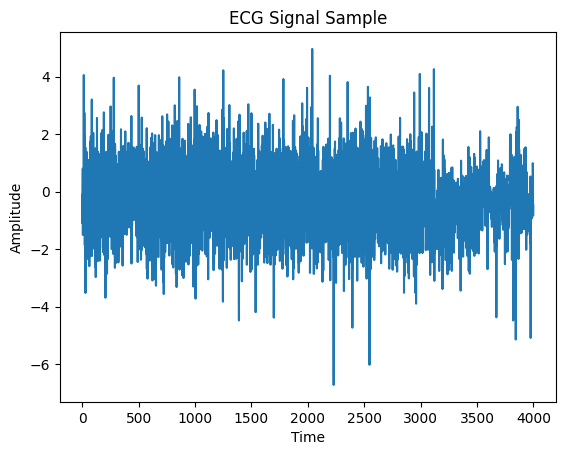

In [44]:
import matplotlib.pyplot as plt

# Assuming first column is signal
plt.plot(df[0][:4000])  # Plot first 500 samples
plt.title('ECG Signal Sample')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()


In [5]:
X = df.iloc[:, :-1].values  # First 140 columns as input
y = df.iloc[:, -1].values   # Last column as label


In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape to (samples, timesteps, features)
X_reshaped = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# LSTM model
model_lstm = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train LSTM
history_lstm = model_lstm.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7229 - loss: 0.5222 - val_accuracy: 0.9675 - val_loss: 0.1287
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9624 - loss: 0.1195 - val_accuracy: 0.9675 - val_loss: 0.1049
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9727 - loss: 0.0884 - val_accuracy: 0.9712 - val_loss: 0.0895
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9643 - loss: 0.1073 - val_accuracy: 0.9750 - val_loss: 0.1014
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9789 - loss: 0.0722 - val_accuracy: 0.9750 - val_loss: 0.0851
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9752 - loss: 0.0876 - val_accuracy: 0.9725 - val_loss: 0.1025
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9766 - loss: 0.0700 - val_accuracy: 0.9688 - val_loss: 0.1044
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9790 - loss: 0.0643 - val_accuracy

In [8]:
from tensorflow.keras.layers import GRU

# GRU model
model_gru = Sequential([
    GRU(64, input_shape=(X_train.shape[1], 1), return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train GRU
history_gru = model_gru.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6481 - loss: 0.5667 - val_accuracy: 0.9463 - val_loss: 0.1692
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9594 - loss: 0.1318 - val_accuracy: 0.9650 - val_loss: 0.1005
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9632 - loss: 0.1098 - val_accuracy: 0.9700 - val_loss: 0.0969
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9729 - loss: 0.0765 - val_accuracy: 0.9750 - val_loss: 0.0868
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9680 - loss: 0.0804 - val_accuracy: 0.9625 - val_loss: 0.0978
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9754 - loss: 0.0713 - val_accuracy: 0.9575 - val_loss: 0.1195
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9701 - loss: 0.0858 - val_accuracy: 0.9675 - val_loss: 0.1010
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9719 - loss: 0.0800 - val_accuracy: 

In [9]:
# Evaluate LSTM
loss_lstm, acc_lstm = model_lstm.evaluate(X_test, y_test)
print(f"LSTM Test Accuracy: {acc_lstm:.4f}")

# Evaluate GRU
loss_gru, acc_gru = model_gru.evaluate(X_test, y_test)
print(f"GRU Test Accuracy: {acc_gru:.4f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9874 - loss: 0.0406
LSTM Test Accuracy: 0.9850
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9745 - loss: 0.0586
GRU Test Accuracy: 0.9780


In [10]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict
y_pred_lstm = (model_lstm.predict(X_test) > 0.5).astype("int32")
y_pred_gru = (model_gru.predict(X_test) > 0.5).astype("int32")

# Report
print("LSTM Classification Report:\n", classification_report(y_test, y_pred_lstm))
print("GRU Classification Report:\n", classification_report(y_test, y_pred_gru))


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
LSTM Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       409
         1.0       0.99      0.99      0.99       591

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000

GRU Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.97      0.97       409
         1.0       0.98      0.98      0.98       591

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



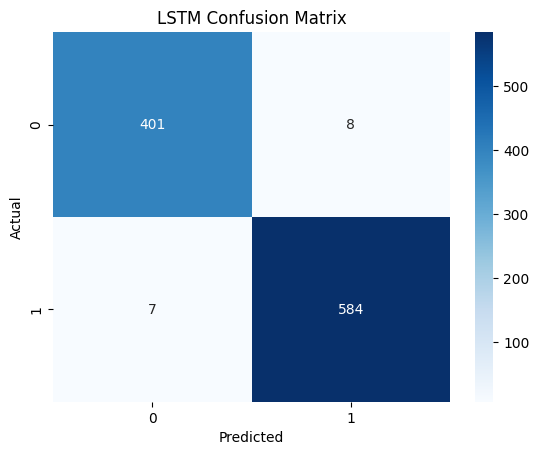

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_lstm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LSTM Confusion Matrix')
plt.show()


In [34]:
import numpy as np

# Example: Random test ECG signal of 140 values (you can replace this with real input)
new_signal = np.random.rand(140)

# Normalize it using the same scaler used during training
new_signal_scaled = scaler.transform(new_signal.reshape(1, -1))  # shape: (1, 140)

# Reshape to (1, 140, 1)
new_signal_reshaped = new_signal_scaled.reshape((1, 140, 1))

# Predict
prediction = model_lstm.predict(new_signal_reshaped)
predicted_class = int(prediction[0][0] > 0.5)

# Output
label = "Normal" if predicted_class == 1 else "Abnormal"
print(f"Predicted ECG Condition: {label} (Confidence: {prediction[0][0]:.4f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted ECG Condition: Abnormal (Confidence: 0.0091)


In [43]:
# Pick a sample from test set (e.g., 10th row)
sample = X_test[417].reshape(1, 140, 1)

# Predict
prediction = model_lstm.predict(sample)
predicted_class = int(prediction[0][0] > 0.5)
label = "Normal" if predicted_class == 1 else "Abnormal"

print(f"Predicted: {label} | Actual: {'Normal' if y_test[417]==1 else 'Abnormal'} | Confidence: {prediction[0][0]:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted: Normal | Actual: Normal | Confidence: 0.9884
